# Practical-14

# Micro-project ----> Fake News Detection

1. ***Pandas: For importing the dataset.***
2. ***Seaborn/Matplotlib: For data visualization.***

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

**Let’s import the downloaded dataset.**

In [2]:
data = pd.read_csv('/kaggle/input/fake-news-dataset/News.csv',index_col=0) 
data.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


**Data preprocessing:
The shape of the dataset can be found by the below code.**

In [3]:
data.shape

(44919, 5)

**As the title, subject and date column will not going to be helpful in identification of the news. So, we can drop these column.**

In [4]:
data = data.drop(["title", "subject","date"], axis = 1)

**Now, we have to check if there is any null value (we will drop those rows)**

In [5]:
data.isnull().sum()

text     0
class    0
dtype: int64

**So there is no null value.**

**Now we have to shuffle the dataset to prevent the model to get bias. After that we will reset the index and then drop it. Because index column is not useful to us.**

In [6]:
# Shuffling 
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 

**Now Let’s explore the unique values in the each category using below code.**

<Axes: xlabel='class', ylabel='count'>

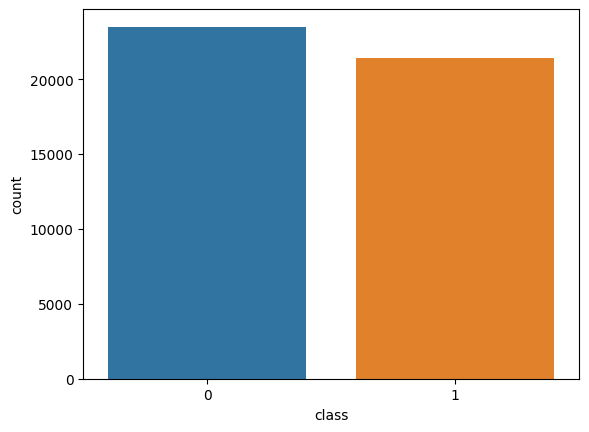

In [7]:
sns.countplot(data=data, 
              x='class', 
              order=data['class'].value_counts().index)

**Preprocessing and analysis of News column:
Firstly we will remove all the stopwords, punctuations and any irrelevant spaces from the text. For that NLTK Library is required and some of it’s module need to be downloaded.**

In [8]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>
[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


**Once we have all the required modules, we can create a function name preprocess text. This function will preprocess all the data given as input.**

In [9]:
def preprocess_text(text_data): 
	preprocessed_text = [] 
	
	for sentence in tqdm(text_data): 
		sentence = re.sub(r'[^\w\s]', '', sentence) 
		preprocessed_text.append(' '.join(token.lower() 
								for token in str(sentence).split() 
								if token not in stopwords.words('english'))) 

	return preprocessed_text

**To implement the function in all the news in the text column, run the below command.**

In [10]:
preprocessed_review = preprocess_text(data['text'].values) 
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [42:52<00:00, 17.46it/s]


**Let’s visualize the WordCloud for fake and real news separately.**

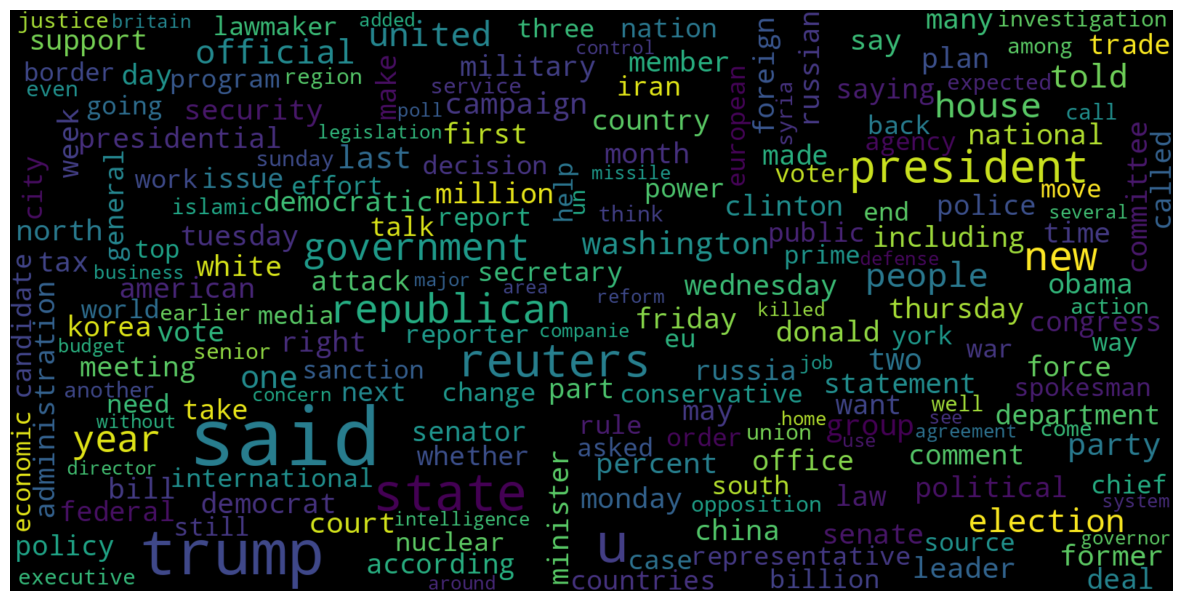

In [11]:
# Real 
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

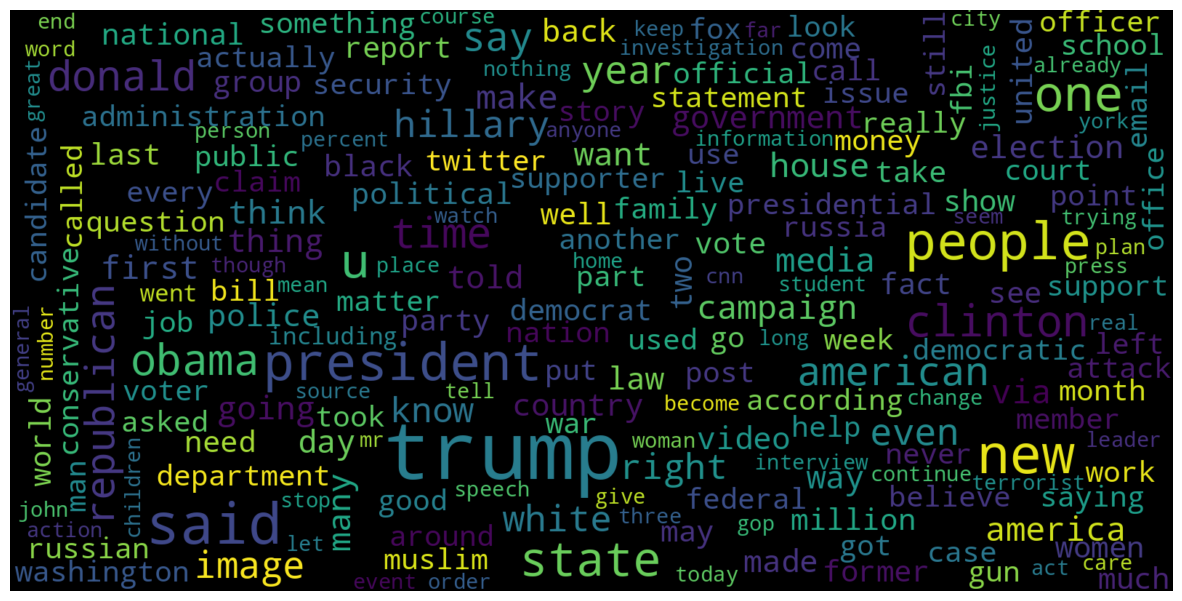

In [12]:
# Fake 
consolidated = ' '.join( 
	word for word in data['text'][data['class'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 

**Converting text into Vectors
Before converting the data into vectors, split it into train and test.**

In [13]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
													data['class'], 
													test_size=0.25)

**Now we can convert the training data into vectors using TfidfVectorizer.**

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer 

vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)

**Model training, Evaluation, and Prediction:
Now, the dataset is ready to train the model.**

**For training we will use Logistic Regression and evaluate the prediction accuracy using accuracy_score.**

In [15]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression() 
model.fit(x_train, y_train) 

# testing the model 
print(accuracy_score(y_train, model.predict(x_train))) 
print(accuracy_score(y_test, model.predict(x_test))) 

0.9937961946035798
0.9896705253784506
